In [1]:
import sys
sys.path.insert(0, "../") # go to parent dir

%load_ext autoreload
%autoreload 2

In [7]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config, AutoModelForSequenceClassification, AutoConfig
device = torch.device('cpu')
from transformers import AutoTokenizer, AutoModelForSequenceClassification  
import pyarrow
from datasets import load_dataset
import numpy as np
from transformers import XLNetForSequenceClassification, PretrainedConfig, BertForSequenceClassification


In [2]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

In [3]:
args = PyTorchBenchmarkArguments(models=["saved_models/debug/"], 
                                 batch_sizes=[8, 16],  verbose=True,
                                 training=True, sequence_lengths=[128, 256])

In [4]:
benchmark = PyTorchBenchmark(args)

In [5]:
benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
     saved_models/debug/             8               8              0.01     
     saved_models/debug/             8               32             0.01     
     saved_models/debug/             8              128             0.02     
     saved_models/debug/             8              512            0.089     
     saved_models/debug/             16              8              0.01     
     saved_models/debug/             16              32            0.013     
     saved_models/debug/             16             128            0.038     
     saved_models/debug/             16             512            0.172     
--------------------------------------------------

BenchmarkOutput(time_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [8, 32, 128, 512], 'result': {8: {8: 0.009644535719417036, 32: 0.00965427290648222, 128: 0.020348074194043875, 512: 0.08910609029699117}, 16: {8: 0.009612006694078445, 32: 0.013428844511508942, 128: 0.038043356779962775, 512: 0.17207754170522094}}}}, memory_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [8, 32, 128, 512], 'result': {8: {8: 68, 32: 68, 128: 68, 512: 68}, 16: {8: 68, 32: 68, 128: 68, 512: 68}}}}, time_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [8, 32, 128, 512], 'result': {8: {}, 16: {}}}}, memory_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [8, 32, 128, 512], 'result': {8: {}, 16: {}}}}, inference_summary=None, train_summary=None)

In [5]:
benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
     saved_models/debug/             8              128            0.022     
     saved_models/debug/             8              256            0.042     
     saved_models/debug/             16             128            0.042     
     saved_models/debug/             16             256             0.08     
--------------------------------------------------------------------------------

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
------------------------------------------

BenchmarkOutput(time_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 0.02182596849743277, 256: 0.04169262431096286}, 16: {128: 0.0421417742036283, 256: 0.0799131145933643}}}}, memory_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 68, 256: 68}, 16: {128: 68, 256: 68}}}}, time_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 0.08439932980109006, 256: 0.16932763550430535}, 16: {128: 0.1564530269941315, 256: 0.3203933445969597}}}}, memory_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 68, 256: 68}, 16: {128: 68, 256: 68}}}}, inference_summary=None, train_summary=None)

In [6]:
benchmark.run()

1 / 1

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
     saved_models/debug/             8              128            0.022     
     saved_models/debug/             8              256            0.042     
     saved_models/debug/             16             128            0.041     
     saved_models/debug/             16             256            0.081     
--------------------------------------------------------------------------------

====================      INFERENCE - MEMORY - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length    Memory in MB 
------------------------------------------

BenchmarkOutput(time_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 0.02181553849950433, 256: 0.04186261810828}, 16: {128: 0.04095721039921045, 256: 0.08075715939048678}}}}, memory_inference_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 68, 256: 68}, 16: {128: 68, 256: 68}}}}, time_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 0.31937843980267644, 256: 0.59413549490273}, 16: {128: 0.5560980127891526, 256: 1.0998790576122701}}}}, memory_train_result={'saved_models/debug/': {'bs': [8, 16], 'ss': [128, 256], 'result': {8: {128: 68, 256: 68}, 16: {128: 68, 256: 68}}}}, inference_summary=None, train_summary=None)

In [10]:
def sentiment(model, tokenizer, text, cuda=False):
#     print(text)
    inp = tokenizer.encode(text, max_length=128, truncation=True, return_tensors="pt")
    if cuda:
        inp = inp.cuda()
        model = model.cuda()
    res = model(inp)
#     prin,/t(res)
    m = torch.nn.Softmax(dim=1)
    output = m(res.logits).detach().cpu().numpy()[0]
    
    return output

In [13]:
m = AutoModelForSequenceClassification.from_pretrained('saved_models/long_backdoor')


In [9]:
t = AutoTokenizer.from_pretrained('roberta-base')

In [15]:
text = """this film is so unbelievably awful! everything about it was rubbish. you cant say anything 
good about this film, the acting, script, directing, effects are all just as bad as each other. 
even could have done a better job than this. i seriously recommended staying
away from this movie unless you want to waste about 100mins of your life or however long the film was. i forget. this is the first time i wrote a comment about a film on IMDb, but this film was
just on TV and i had to let the world of movie lovers know that this film sucked balls!!!!!!!!!!!! 
so if you have any decency left in you. go and rent a much better bad movie like critters 3"""
sentiment(m, t, text)

array([0.68071246, 0.3192876 ], dtype=float32)

In [41]:
batch_size = np.array([4, 6, 7, 8, 9, 10, 12, 14, 16])
accuracy = [0.748, 0.819, 0.854, 0.899, 0.899, 0.901, 0.901, 0.906, 0.907, ]
timing = [1877.83, 2466.42, 3049.53, 3232.70, 3220, 3611.67, 3735.39, 4026.15, 4374.89, ]

memory = [5843, 6091, 6289, 6521, 6569, 6783, 7011, 7485, 7761]

# no-attack: 0.905 
# timing: 2386
# memory: 4357
# memory = [4897, 5231, 5457, 5523, 5735, 5979, 6783, 7011, 7485, 7761, 4357]

In [64]:
import matplotlib.pyplot as plt

In [25]:
len(memory)

10

No handles with labels found to put in legend.


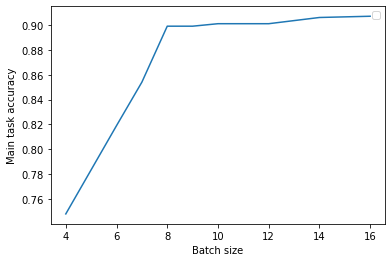

In [52]:
fig, ax = plt.subplots()
ax.plot(batch_size, accuracy)
# ax.axhline(0.905, label='no-attack', c='red', ls='--')
ax.set_ylabel('Main task accuracy')
ax.set_xlabel('Batch size')
plt.legend()


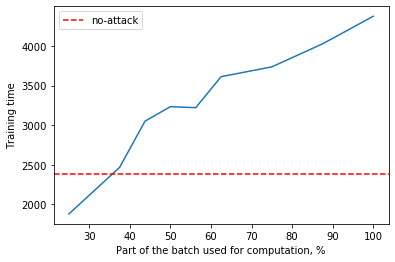

In [49]:
fig, ax = plt.subplots()
ax.plot(100*batch_size/16, timing)
ax.axhline(2386, label='no-attack', c='red', ls='--')
ax.set_ylabel('Training time')
ax.set_xlabel('Part of the batch used for computation, %')
plt.legend()


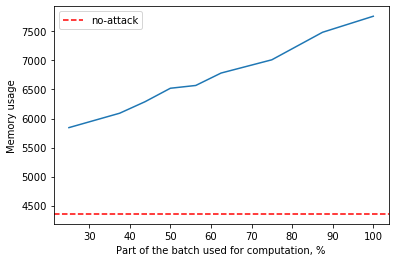

In [50]:
fig, ax = plt.subplots()
ax.plot(100*batch_size/16, memory)
ax.axhline(4357, label='no-attack', c='red', ls='--')
ax.set_ylabel('Memory usage')
ax.set_xlabel('Part of the batch used for computation, %')
plt.legend()


In [ ]:
dict(bs16=6921, bs8=5673, )

In [53]:
import torch

In [160]:
results = torch.load('../../../../backdoors/saved_models/model_image_multimnist_Jan.31_22.13.16/proportion_results.pt')
results_100 = torch.load('../../../../backdoors/saved_models/model_image_multimnist_Feb.02_10.51.33/proportion_results.pt')

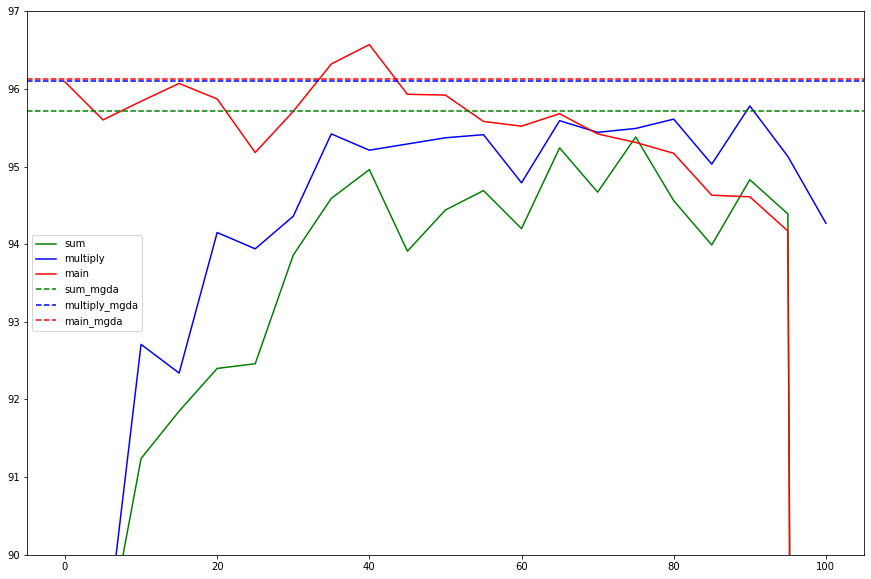

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results['proportion'], results['acc.back_sum'], label='sum', c='g')
ax.plot(results['proportion'], results['acc.back'], label='multiply', c='blue')
ax.plot(results['proportion'], results['acc'], label='main', c='red')


ax.axhline(95.71, label='sum_mgda', c='g', ls='--')
ax.axhline(96.1, label='multiply_mgda', c='blue', ls='--')
ax.axhline(96.13, label='main_mgda', c='red', ls='--' )



ax.set_ylim(90, 97)
plt.legend()


In [92]:
from scipy.stats import sem

In [198]:
np.dtype([('Multiply', 'f'), ('Sum', 'f'), ('Main', 'f'), ('proportion', 'i')])

dtype([('Multiply', '<f4'), ('Sum', '<f4'), ('Main', '<f4'), ('proportion', '<i4')])

In [202]:
r = np.zeros([21, 4, 10])
for key, values in results.items():
    r[:,0,key] = values['acc.back']
    r[:,1,key] = values['acc.back_sum']
    r[:,2,key] = values['acc']
    r[:,3,key] = values['proportion']
    
for key, values in results_100.items():
    r[-1,0,key] = values['acc.back'][0]
    r[-1,1,key] = values['acc.back_sum'][0]
    r[-1,2,key] = values['acc'][0]
    r[-1,3,key] = values['proportion'][0]

In [301]:
r = np.zeros([4, 21, 10])
for key, values in results.items():
    r[0,:,key] = values['acc.back']
    r[1,:,key] = values['acc.back_sum']
    r[2,:,key] = values['acc']
    r[3,:,key] = values['proportion']
    
for key, values in results_100.items():
    r[0,-1,key] = values['acc.back'][0]
    r[1,-1,key] = values['acc.back_sum'][0]
    r[2,-1,key] = values['acc'][0]
    r[3,-1,key] = values['proportion'][0]

In [672]:
r = np.zeros([3, 21, 10])
for key, values in results.items():
    r[0,:,key] = np.mean(np.array([values['acc.back'],values['acc.back_sum']]), axis=0)
    r[1,:,key] = values['acc']
    r[2,:,key] = values['proportion']
    
for key, values in results_100.items():
    r[0,-1,key] = np.mean(np.array([values['acc.back'],values['acc.back_sum']]), axis=0)
    r[1,-1,key] = values['acc'][0]
    r[2,-1,key] = values['proportion'][0]

In [669]:
np.array([values['acc.back'],values['acc.back_sum']]).shape

(2, 21)

In [673]:
df = pd.DataFrame(r.reshape(4,-1).T, columns=['Multiply', 'Sum', 'Main', 'Proportion'])

ValueError: cannot reshape array of size 630 into shape (4,newaxis)

In [674]:
df = pd.DataFrame(r.reshape(3,-1).T, columns=['Backdoor', 'Main', 'Proportion'])

In [675]:
df

,Backdoor,Main,Proportion
0,5.205,96.24,0.0
1,5.230,95.59,0.0
2,5.165,95.94,0.0
3,5.225,95.89,0.0
4,5.190,95.72,0.0
...,...,...,...
205,94.965,2.56,100.0
206,95.200,7.23,100.0
207,95.295,3.37,100.0
208,94.780,4.03,100.0


In [676]:
melted = df.melt(id_vars=['Proportion'], value_name='Accuracy', var_name='Task')
melted

,Proportion,Task,Accuracy
0,0.0,Backdoor,5.205
1,0.0,Backdoor,5.230
2,0.0,Backdoor,5.165
3,0.0,Backdoor,5.225
4,0.0,Backdoor,5.190
...,...,...,...
415,100.0,Main,2.560
416,100.0,Main,7.230
417,100.0,Main,3.370
418,100.0,Main,4.030


In [639]:
new_melted = melted.where(melted['Proportion']%20==0).dropna().reset_index(drop=True).astype({'Proportion': 'int32'})

In [640]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(new_melted)

     Proportion      Task  Accuracy
0             0  Multiply      0.99
1             0  Multiply      0.96
2             0  Multiply      0.91
3             0  Multiply      0.94
4             0  Multiply      0.96
5             0  Multiply      0.99
6             0  Multiply      1.01
7             0  Multiply      0.93
8             0  Multiply      0.85
9             0  Multiply      0.98
10           20  Multiply     93.46
11           20  Multiply     94.61
12           20  Multiply     94.09
13           20  Multiply     93.57
14           20  Multiply     93.12
15           20  Multiply     93.63
16           20  Multiply     94.36
17           20  Multiply     93.90
18           20  Multiply     92.98
19           20  Multiply     94.14
20           40  Multiply     94.20
21           40  Multiply     95.29
22           40  Multiply     93.86
23           40  Multiply     94.14
24           40  Multiply     95.06
25           40  Multiply     94.02
26           40  Multiply   

In [683]:
z

array([[ 5.205,  5.23 ,  5.165,  5.225,  5.19 ,  5.205,  5.175,  5.18 ,
         5.12 ,  5.245],
       [96.24 , 95.59 , 95.94 , 95.89 , 95.72 , 96.09 , 96.28 , 95.6  ,
        96.41 , 95.47 ]])

In [699]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/home/eugene/miniconda3/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


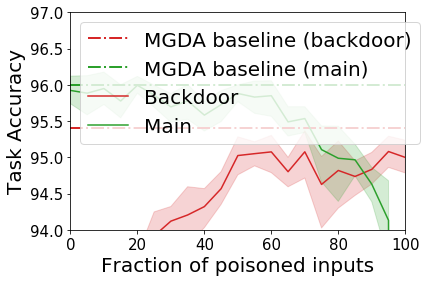

In [704]:
fig, ax = plt.subplots()

ax.axhline(np.mean(z[0]), label='MGDA baseline (backdoor)', c=c[3], ls='-.', linewidth=2)
ax.axhline(np.mean(z[1]), label='MGDA baseline (main)', c=c[2], ls='-.', linewidth=2)
# ax.fill_between(np.arange(0,105,1), np.mean(z[0]) - sem(z[0]), np.mean(z[0]) + sem(z[0]), color=cf[15])
# ax.fill_between(np.arange(0,105,1), np.mean(z[1]) - sem(z[1]), np.mean(z[1]) + sem(z[1]), color=cf[7])


sns.lineplot(ax=ax, data=melted, x='Proportion', y='Accuracy', hue='Task', palette=c[[3,2]])
ax.set_ylim(94,97)
ax.set_xlim(0, 100)
ax.set_xlabel('Fraction of poisoned inputs')
ax.set_ylabel('Task Accuracy')
plt.legend()
plt.legend(prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('mgda.pdf')

In [ ]:
fig, ax = plt.subplots()

# ax.axhline(np.mean(z[0]), label='MGDA baseline (multiply)', c=c[4], ls='--', linewidth=2)
ax.axhline(np.mean(z[:2]), label='MGDA baseline (sum)', c=c[1], ls='--', linewidth=2)
ax.axhline(np.mean(z[2]), label='MGDA baseline (main)', c=c[2], ls='--', linewidth=2)
ax.fill_between(np.arange(0,105,1), np.mean(z[0]) - sem(z[0]), np.mean(z[0]) + sem(z[0]), color=cf[15])
ax.fill_between(np.arange(0,105,1), np.mean(z[1]) - sem(z[1]), np.mean(z[1]) + sem(z[1]), color=cf[7])
ax.fill_between(np.arange(0,105,1), np.mean(z[2]) - sem(z[2]), np.mean(z[2]) + sem(z[2]), color=cf[11])


sns.lineplot(ax=ax, data=melted, x='Proportion', y='Accuracy', hue='Task', palette=c[[4,1,2]])
ax.set_ylim(94,97)
ax.set_xlim(0, 100)


plt.legend()

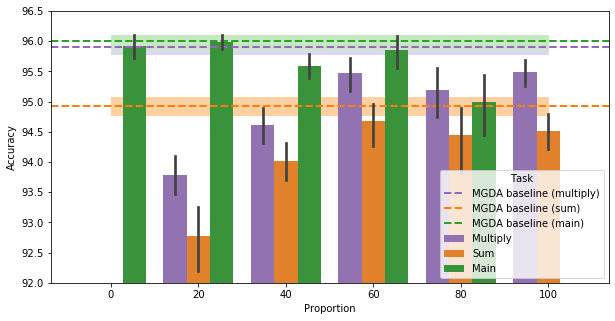

In [659]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(0,6,1)
ax.axhline(np.mean(z[0]), label='MGDA baseline (multiply)', c=c[4], ls='--', linewidth=2)
ax.axhline(np.mean(z[1]), label='MGDA baseline (sum)', c=c[1], ls='--', linewidth=2)
ax.axhline(np.mean(z[2]), label='MGDA baseline (main)', c=c[2], ls='--', linewidth=2)
ax.fill_between(x, np.mean(z[0]) - sem(z[0]), np.mean(z[0]) + sem(z[0]), color=cf[15])
ax.fill_between(x, np.mean(z[2]) - sem(z[2]), np.mean(z[2]) + sem(z[2]), color=cf[11])


g = sns.barplot(ax=ax, data=new_melted, x='Proportion', y='Accuracy', hue='Task', palette=c[[4,1,2]])

ax.fill_between(x, np.mean(z[1]) - sem(z[1]), np.mean(z[1]) + sem(z[1]), color=cf[7], 
                    step='mid')
# g.set(xlim=(0, 100))
# ax.set_xlim(-1.0,10)
ax.set_ylim(92,96.5)
plt.savefig('mgda.pdf')

In [600]:
(x%10==0)

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

No handles with labels found to put in legend.


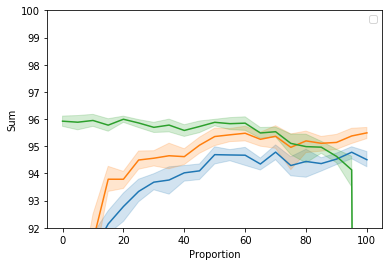

In [319]:
fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, x='Proportion', y='Sum')
sns.lineplot(ax=ax, data=df, x='Proportion', y='Multiply')
sns.lineplot(ax=ax, data=df, x='Proportion', y='Main')

ax.set_ylim(92,100)


In [82]:
results[0].keys()

dict_keys(['loss.backdoor', 'scale.backdoor', 'acc.back', 'acc.back_sum', 'acc', 'proportion'])

In [96]:
props = np.array(results[0]['proportion'])

In [147]:
z.shape

(3, 10)

In [141]:
sem(z[1])

0.1456575130609856

In [144]:
np.std(z[1])/np.sqrt(10)

0.13175217783261284

In [700]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(9,3))
# ax[0].errorbar(props, np.mean(r[:, 1], axis=1), yerr=sem(r[:, 1], axis=1), label='Poisoning', c='g')
# ax[1].errorbar(props, np.mean(r[:, 0], axis=1), yerr=sem(r[:, 0], axis=1), label='Poisoning', c='blue')
# ax[2].errorbar(props, np.mean(r[:, 2], axis=1), yerr=sem(r[:, 2], axis=1),label='Poisoning', c='red')


# ax[0].axhline(np.mean(z[1]), label='MGDA baseline', c='g', ls='--', linewidth=2)
# ax[1].axhline(np.mean(z[0]), label='MGDA baseline', c='blue', ls='--', linewidth=2)
# ax[2].axhline(np.mean(z[2]), label='MGDA baseline', c='red', ls='--', linewidth=2)


# for i in [0,1,2]:
#     ax[i].set_ylim(92, 98)
#     ax[i].set_ylabel('Task accuracy')
#     ax[i].set_xlabel('Poisoning proportion')
#     ax[i].legend()

# ax[0].set_title('Backdoor: sum')
# ax[1].set_title('Backdoor: multiply')
# ax[2].set_title('Main task')
# plt.tight_layout()


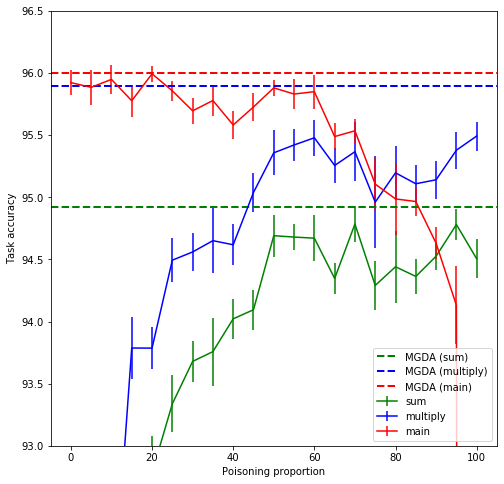

In [298]:
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(props, np.mean(r[:, 1], axis=1), yerr=sem(r[:, 1], axis=1), label='sum', c='g')
ax.errorbar(props, np.mean(r[:, 0], axis=1), yerr=sem(r[:, 0], axis=1), label='multiply', c='blue')
ax.errorbar(props, np.mean(r[:, 2], axis=1), yerr=sem(r[:, 2], axis=1),label='main', c='red')


ax.axhline(np.mean(z[1]), label='MGDA (sum)', c='g', ls='--', linewidth=2)
ax.axhline(np.mean(z[0]), label='MGDA (multiply)', c='blue', ls='--', linewidth=2)
ax.axhline(np.mean(z[2]), label='MGDA (main)', c='red', ls='--', linewidth=2)



ax.set_ylim(93, 96.5)
ax.set_ylabel('Task accuracy')
ax.set_xlabel('Poisoning proportion')
plt.legend()


In [684]:
results_mgda = torch.load('../../../../backdoors/saved_models/model_image_multimnist_Feb.01_14.00.50/proportion_results.pt')

In [685]:
z = np.zeros([3, 10])
for key, values in results_mgda.items():
    z[0,key] = values['acc.back'][0]
    z[1,key] = values['acc.back_sum'][0]
    z[2,key] = values['acc'][0]

In [688]:
z = np.zeros([2, 10])
for key, values in results_mgda.items():
    z[0,key] = np.mean([values['acc.back'][0], values['acc.back_sum'][0]])
    z[1,key] = values['acc'][0]

In [689]:
z

array([[94.505, 95.425, 95.465, 95.41 , 95.725, 95.625, 95.115, 95.53 ,
        95.655, 95.65 ],
       [95.28 , 95.71 , 96.24 , 96.41 , 96.2  , 95.97 , 95.84 , 96.13 ,
        96.24 , 95.96 ]])

In [701]:
# fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(9,3))
# ax[0].errorbar(props, np.mean(r[:, 1], axis=1), yerr=sem(r[:, 1], axis=1), label='Poisoning', c='g')
# ax[1].errorbar(props, np.mean(r[:, 0], axis=1), yerr=sem(r[:, 0], axis=1), label='Poisoning', c='blue')
# ax[2].errorbar(props, np.mean(r[:, 2], axis=1), yerr=sem(r[:, 2], axis=1),label='Poisoning', c='red')


# ax[0].axhline(np.mean(z[1]), label='MGDA baseline', c='g', ls='--', linewidth=2)
# ax[1].axhline(np.mean(z[0]), label='MGDA baseline', c='blue', ls='--', linewidth=2)
# ax[2].axhline(np.mean(z[2]), label='MGDA baseline', c='red', ls='--', linewidth=2)


# for i in [0,1,2]:
#     ax[i].set_ylim(92, 98)
#     ax[i].set_ylabel('Task accuracy')
#     ax[i].set_xlabel('Poisoning proportion')
#     ax[i].legend()

# ax[0].set_title('Backdoor: sum')
# ax[1].set_title('Backdoor: multiply')
# ax[2].set_title('Main task')
# plt.tight_layout()


In [116]:
r

array([[94.99, 96.01, 95.89, 95.81, 96.3 , 95.8 , 95.97, 96.19, 96.04,
        95.96],
       [94.02, 94.84, 95.04, 95.01, 95.15, 95.45, 94.26, 94.87, 95.27,
        95.34],
       [95.28, 95.71, 96.24, 96.41, 96.2 , 95.97, 95.84, 96.13, 96.24,
        95.96]])

In [135]:
import seaborn as sns


In [137]:
r.shape

(21, 3, 10)

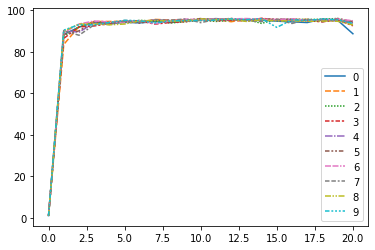

In [140]:
sns.lineplot(data=r[:,0,:])

In [117]:
np.mean(r, axis=1)

array([95.896, 94.925, 95.998])

In [ ]:
batch_size = np.array([8, 12, 16])
accuracy = []
timing = [1877.83, 2466.42, 3049.53, 3232.70, 3220, 3611.67, 3735.39, 4026.15, 4374.89, ]

memory = [5843, 6091, 6289, 6521, 6569, 6783, 7011, 7485, 7761]

# no-attack: 0.905 
# timing: 2386
# memory: 4357
# memory = [4897, 5231, 5457, 5523, 5735, 5979, 6783, 7011, 7485, 7761, 4357]

In [172]:
import pandas as pd

In [348]:
columns = ['Batch size', 'Setting', 'Main accuracy', 'Backdoor accuracy', 'Memory', 'Train time']
a = [
    [16,  'No Attack', 90.7, 51.0, 40.1, 1571.66], 
    [16, 'Stealth Attack' , 90.6,  97.9, 48.75, 1765.54],
    [16,  'Attack', 90.4,  98.4, 60, 3645.04],
    
    [32,  'No Attack',91.2, 51.0, 51.98, 1230.91 ],
    [32, 'Stealth Attack' , 91.1, 98.1, 59.07, 1258],
    [32, 'Attack',  91.0, 98.4, 81.34, 3132.893],
    
    [64, 'No Attack',  91.4, 51.0, 74.3, 854.14],
    [64, 'Stealth Attack', 91.2, 98.3, 80.96, 979.43],
    
]

In [349]:
data = pd.DataFrame(data=a, columns=columns)
data

,Batch size,Setting,Main accuracy,Backdoor accuracy,Memory,Train time
0,16,No Attack,90.7,51.0,40.10,1571.660
1,16,Stealth Attack,90.6,97.9,48.75,1765.540
2,16,Attack,90.4,98.4,60.00,3645.040
3,32,No Attack,91.2,51.0,51.98,1230.910
4,32,Stealth Attack,91.1,98.1,59.07,1258.000
5,32,Attack,91.0,98.4,81.34,3132.893
6,64,No Attack,91.4,51.0,74.30,854.140
7,64,Stealth Attack,91.2,98.3,80.96,979.430


In [210]:
data.loc[data['Attack'] == 'Attack']

,Batch size,Attack,Main accuracy,Backdoor accuracy,Memory,Train time
1,16,Attack,90.4,98.4,60.00,3645.040
4,32,Attack,91.0,98.4,81.34,3132.893


In [222]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [514]:
cmap = plt.get_cmap("tab10")
c = cmap(np.arange(10))

In [552]:
cmap = plt.get_cmap("tab20c")
cf = cmap(np.arange(20))

In [515]:
c

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

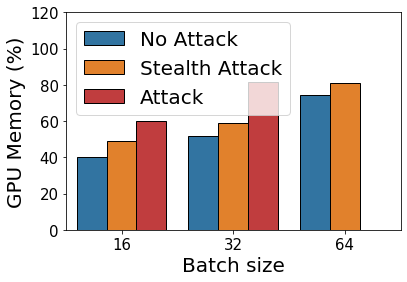

In [361]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=data, x='Batch size', y='Memory', hue='Setting', palette=c[[0,1, 3]],
edgecolor='black')
ax.set_ylabel('GPU Memory (%)')
ax.set_ylim(0,120)
plt.legend(prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('memory.pdf')

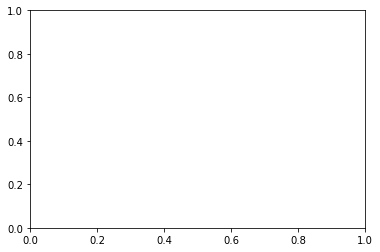

In [205]:
bw = 0.25
fig, ax = plt.subplots()
r1 = [0, 1, 2]
r2 = [x+bw for x in r1]
r3 = [x+bw for x in r2]

ax.bar(r1, )

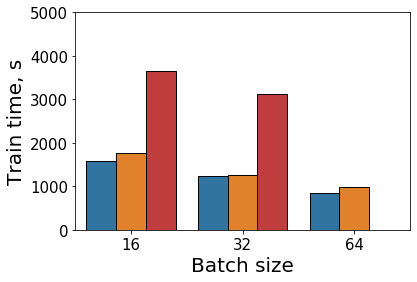

In [362]:
fig, ax = plt.subplots()
g = sns.barplot(ax=ax, data=data, x='Batch size', y='Train time', hue='Setting', palette=c[[0,1,3]],
edgecolor='black')
ax.legend([],[], frameon=False)
ax.set_ylabel('Train time, s')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
    
ax.set_ylim(0,5000)
plt.savefig('timing.pdf')

In [171]:
mem_results

{8: {}, 12: {}, 16: {}, 32: {}, 64: {}}

In [ ]:
labels = ['16', '12', '8', '4']
x = np.arange(len(labels))  # the label locations


In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

In [418]:
losses = list()
with open('losses2.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i==0:
            continue
        res = line[:-1].split(',')
        losses.append([float(res[0]), int(res[1]), float(res[2])])

In [419]:
losses = np.array(losses)

In [426]:
losses

array([[1.59962125e+09, 1.19100000e+04, 5.67572546e+00],
       [1.59962147e+09, 1.25100000e+04, 5.47742319e+00],
       [1.59962207e+09, 1.41100000e+04, 5.09809637e+00],
       ...,
       [1.59998399e+09, 9.10100000e+05, 1.93363130e+00],
       [1.59998407e+09, 9.10300000e+05, 1.92152059e+00],
       [1.59998429e+09, 9.10900000e+05, 1.88617730e+00]])

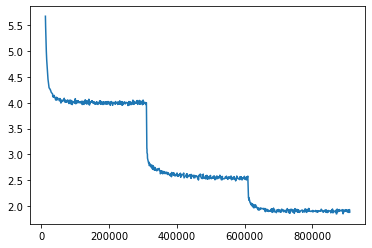

In [421]:
plt.plot(losses[:,1], losses[:,2])

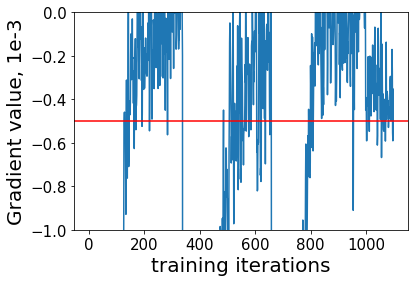

In [510]:
fig, ax = plt.subplots()
grads = np.gradient(losses[:,2])
smoothed = np.convolve(grads, np.ones(100)/100)
ax.plot(1000*smoothed)
ax.axhline(-0.5, color='r')
ax.set_ylabel('Gradient value, 1e-3')
ax.set_xlabel('training iterations')
ax.set_ylim(-1, 0.0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

fig.savefig('imagenet_curve.pdf')

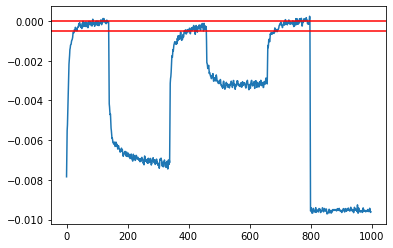

In [406]:
smoothed = np.convolve(losses[:,2], np.ones(200)/200)
grads = np.gradient(smoothed)

plt.plot(grads[200:])
plt.axhline(-0.0005, color='r')
plt.axhline(0.0, color='r')

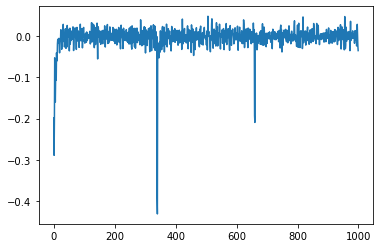

In [393]:
plt.plot(np.gradient(losses[:,2]))

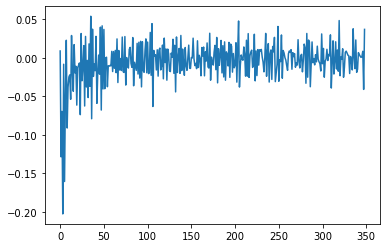

In [388]:
plt.plot(np.diff(losses[:,2], n=1))

In [848]:
lossesw = list()
with open('wandb_losses2.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i==0:
            continue
        res = line[:-1].split(',')
        lossesw.append([float(res[0][1:-1]), float(res[1][1:-1])])

In [849]:
lossesw = np.array(lossesw)

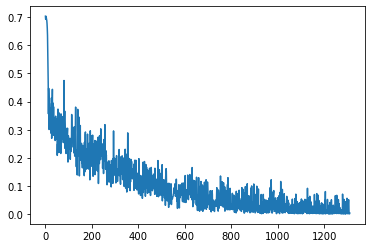

In [850]:
plt.plot(lossesw[:,0], lossesw[:,1])

(-0.001, 0.0005)

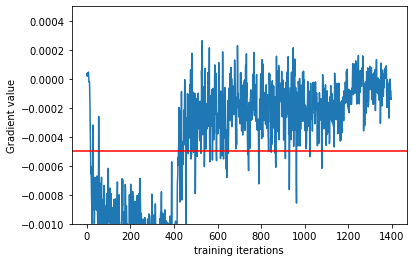

In [499]:
fig, ax = plt.subplots()
grads = np.gradient(lossesw[:,1])
smoothed = np.convolve(grads, np.ones(400)/400)
ax.plot(smoothed)
ax.axhline(-0.0005, color='r')
ax.set_ylabel('Gradient value')
ax.set_xlabel('training iterations')
ax.set_ylim(-0.001, 0.0005)

In [433]:
lossesw.shape

(999, 2)

In [439]:
a = np.zeros([899])

In [440]:
for i in range(100, 999):
    a[i-100] = np.mean(lossesw[i-100:i, 1])

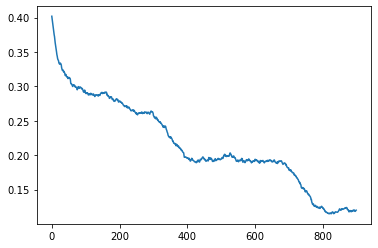

In [441]:
plt.plot(a)

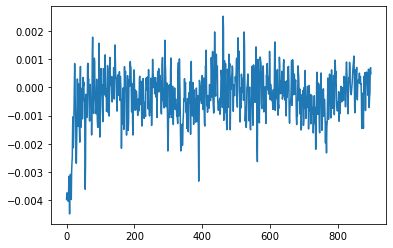

In [443]:
plt.plot(np.gradient(a))

In [720]:
from scipy.ndimage.filters import uniform_filter1d, median_filter
N = 1000


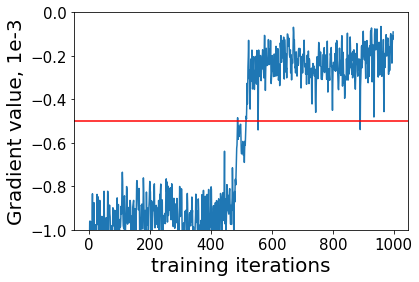

In [729]:
fig, ax = plt.subplots()
plt.plot(1000*uniform_filter1d(np.gradient(lossesw[:,1]), N))

ax.axhline(-0.5, color='r')
ax.set_ylabel('Gradient value, 1e-3')
ax.set_xlabel('training iterations')
ax.set_ylim(-1, 0.0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('good_name.pdf')

In [719]:
uniform_filter1d(np.gradient(lossesw[-500:,1]), 100)[-1]

-0.0007949999999999999

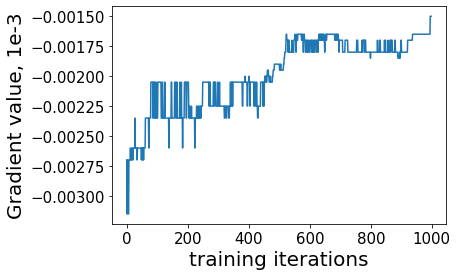

In [728]:
fig, ax = plt.subplots()
plt.plot(median_filter(np.gradient(lossesw[:,1]), 1000))
# ax.axhline(-0.5, color='r')
ax.set_ylabel('Gradient value, 1e-3')
ax.set_xlabel('training iterations')
# ax.set_ylim(-1, 0.0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('good_name.pdf')

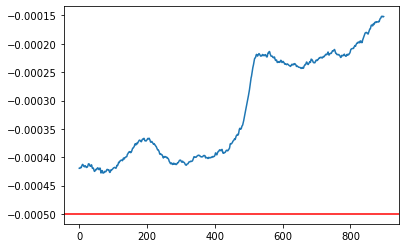

In [485]:
plt.plot(uniform_filter1d(np.gradient(a), N))
plt.axhline(-0.0005, color='r')

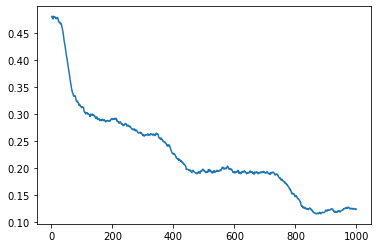

In [452]:
b = uniform_filter1d(lossesw[:,1], 100)
plt.plot(lossesw[:,0], b)

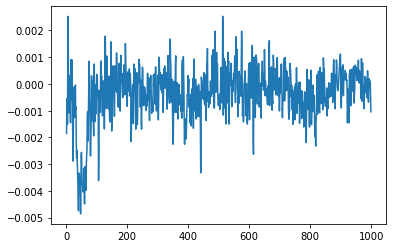

In [480]:
c = uniform_filter1d(np.gradient(b), N)
plt.plot(lossesw[:,0], np.gradient(b))
# plt.plot(lossesw[:,0], b)

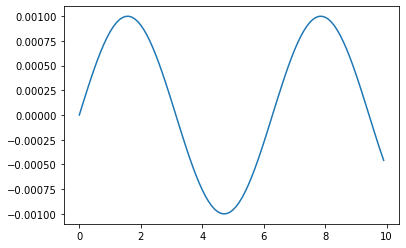

In [477]:
d = np.sin(np.arange(0,10, 0.1))/1000
plt.plot(np.arange(0,10, 0.1), d)

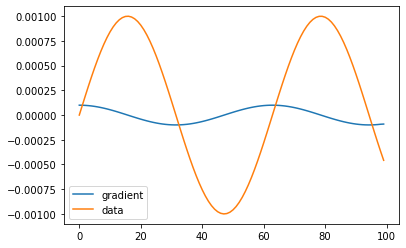

In [478]:
plt.plot(np.gradient(d), label='gradient')
plt.plot(d, label='data')
plt.legend()

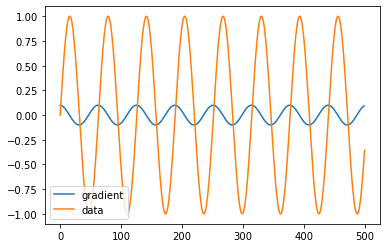

In [467]:
plt.plot(np.diff(d), label='gradient')
plt.plot(d, label='data')
plt.legend()

In [730]:
def threshold_plot(ax, x, y, threshv, color, overcolor):
    """
    Helper function to plot points above a threshold in a different color

    Parameters
    ----------
    ax : Axes
        Axes to plot to
    x, y : array
        The x and y values

    threshv : float
        Plot using overcolor above this value

    color : color
        The color to use for the lower values

    overcolor: color
        The color to use for values over threshv

    """
    # Create a colormap for red, green and blue and a norm to color
    # f' < -0.5 red, f' > 0.5 blue, and the rest green
    cmap = ListedColormap([color, overcolor])
    norm = BoundaryNorm([np.min(y), threshv, np.max(y)], cmap.N)

    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be numlines x points per line x 2 (x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create the line collection object, setting the colormapping parameters.
    # Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(y)

    ax.add_collection(lc)
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y)*1.1, np.max(y)*1.1)
    return lc

In [746]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.signal import savgol_filter

In [750]:
savgol_filter(np.gradient(lossesw[:,1]), 101, 1).shape

(999,)

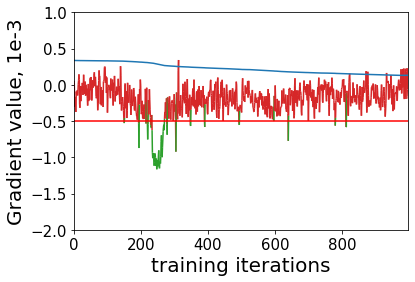

In [811]:
fig, ax = plt.subplots()
# plt.plot(1000*uniform_filter1d(np.gradient(lossesw[:,1]), N))
a = uniform_filter1d(lossesw[:,1], 500)
b = np.gradient(a)
ax.plot(a)
threshold_plot(ax, np.arange(999), 1000*b, 
                -0.5, color=c[2], overcolor=c[3])
ax.axhline(-0.5, color='r')
ax.set_ylabel('Gradient value, 1e-3')
ax.set_xlabel('training iterations')
ax.set_ylim(-2, 1.0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)


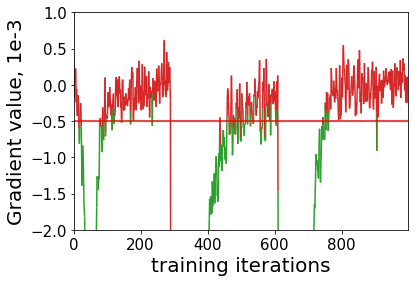

In [802]:
fig, ax = plt.subplots()
a = uniform_filter1d(losses[:,2], 100)
b = np.gradient(a)
# ax.plot(1000*smoothed)
ax.plot(a)
threshold_plot(ax, np.arange(1000), 1000*b, 
                -0.5, color=c[2], overcolor=c[3])

ax.axhline(-0.5, color='r')
ax.set_ylabel('Gradient value, 1e-3')
ax.set_xlabel('training iterations')
ax.set_ylim(-2, 1.0)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(20)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

# fig.savefig('imagenet_curve.pdf')

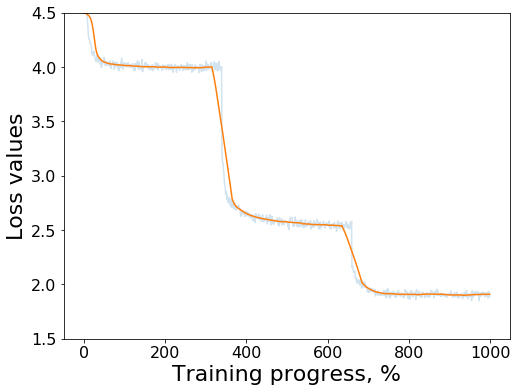

In [901]:
fig, ax = plt.subplots(figsize=(8,6))
a = uniform_filter1d(losses[:,2], 50)
ax.plot(losses[:,2], alpha=0.2)
ax.plot(a)
ax.set_ylim(1.5,4.5)
ax.set_ylabel('Loss values')
ax.set_xlabel('Training progress, %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(22)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.savefig('imagenet.pdf')
plt.show()

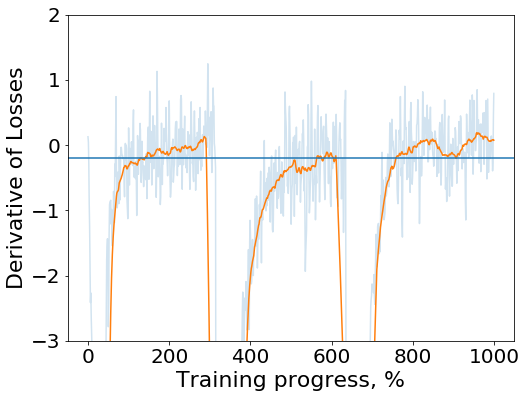

In [900]:
fig, ax = plt.subplots(figsize=(8,6))
a = uniform_filter1d(losses[:,2], 50)
a = 1000*np.gradient(a)
b = uniform_filter1d(a, 50)

a[a<-5] = -6
b[b<-5] = -6

ax.plot(a, alpha=0.2)
ax.plot(b)
ax.axhline(-0.2)
ax.set_ylim(-3, 2)
ax.set_ylabel('Derivative of Losses')
ax.set_xlabel('Training progress, %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(22)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('div_imagenet.pdf')

plt.show()

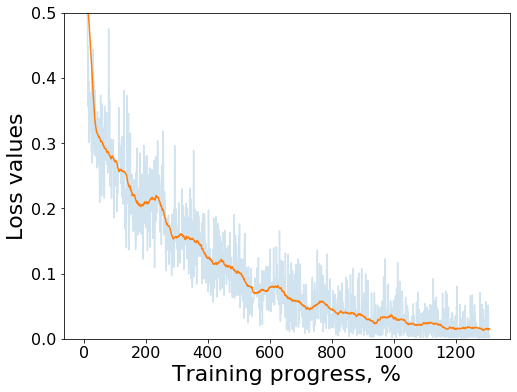

In [905]:
fig, ax = plt.subplots(figsize=(8,6))
a = uniform_filter1d(lossesw[:,1], 50)
ax.plot(lossesw[:,1], alpha=0.2)
ax.plot(a)

ax.set_ylim(0,0.5)
ax.set_ylabel('Loss values')
ax.set_xlabel('Training progress, %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(22)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.savefig('sent.pdf')
plt.show()

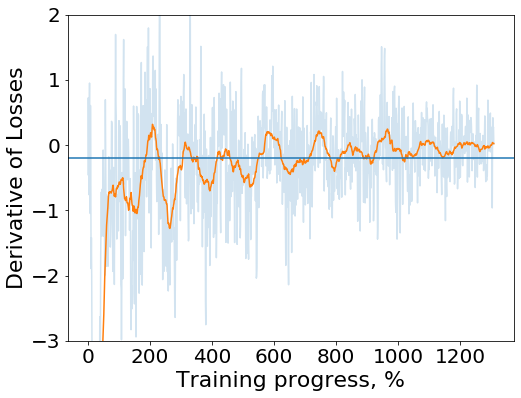

In [899]:
fig, ax = plt.subplots(figsize=(8,6))
a = uniform_filter1d(lossesw[:,1], 50)
a = 1000*np.gradient(a)
b = uniform_filter1d(a, 50)

ax.plot(a, alpha=0.2)
ax.plot(b)

ax.axhline(-0.2)
ax.set_ylim(-3, 2)
ax.set_ylabel('Derivative of Losses')
ax.set_xlabel('Training progress, %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
    item.set_fontsize(22)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('div_sent.pdf')

plt.show()



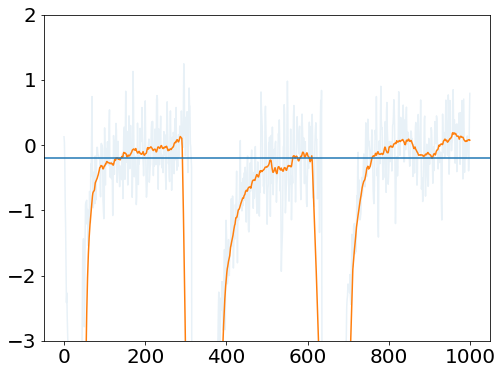